### Facebook - Symbol (FB) 
I am going to be looking at the dataset for Facebook from when it first started trading. I will look at its historical data of OHLCV and apply some technical indicators too it. 

Talk about FB etc.

On May 18, 2012, Facebook held its initial public offering and, at that time, it was the largest technology IPO in U.S. history. Facebook offered 421,233,615 shares at a price of \\$38.00 per share and raised \\$16.007 billion through that offering.

In [38]:
import datetime as dt
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import talib as ta
import plotly.graph_objects as go
import seaborn as sn

In [52]:
start = dt.datetime(2002,9,1).date()
end = pd.to_datetime("today").date()
company = "FB"
dataset = web.DataReader(company,"yahoo",start,end)

df=pd.DataFrame(dataset)

print("Most recent data:")
print(df.tail())

Most recent data:
                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-04-03  157.910004  150.830002  157.149994  154.179993  25983300   
2020-04-06  166.199997  158.509995  160.149994  165.550003  28453600   
2020-04-07  173.389999  166.009995  171.789993  168.830002  31411900   
2020-04-08  175.000000  167.740005  171.250000  174.279999  21641300   
2020-04-09  177.080002  171.570007  175.899994  174.059998  14078594   

             Adj Close  
Date                    
2020-04-03  154.179993  
2020-04-06  165.550003  
2020-04-07  168.830002  
2020-04-08  174.279999  
2020-04-09  174.059998  


In [4]:
print("The oldest data:")
print(df.head())

The oldest data:
                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2012-05-18  45.000000  38.000000  42.049999  38.230000  573576400  38.230000
2012-05-21  36.660000  33.000000  36.529999  34.029999  168192700  34.029999
2012-05-22  33.590000  30.940001  32.610001  31.000000  101786600  31.000000
2012-05-23  32.500000  31.360001  31.370001  32.000000   73600000  32.000000
2012-05-24  33.209999  31.770000  32.950001  33.029999   50237200  33.029999


In [5]:
print("Dates/Columns")
df.shape

Dates/Columns


(1986, 6)

In [6]:
df.size

11916

In [7]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1986 entries, 2012-05-18 to 2020-04-09
Data columns (total 6 columns):
High         1986 non-null float64
Low          1986 non-null float64
Open         1986 non-null float64
Close        1986 non-null float64
Volume       1986 non-null int64
Adj Close    1986 non-null float64
dtypes: float64(5), int64(1)
memory usage: 108.6 KB


In [11]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1986.000000
mean,113.674854,111.164824,112.447754,112.474399,3.299131e+07,112.474399
std,58.574558,57.556806,58.069134,58.122184,2.955886e+07,58.122184
min,18.270000,17.549999,18.080000,17.730000,5.913100e+06,17.730000
25%,65.682503,63.960001,64.777498,64.875002,1.616472e+07,64.875002
50%,114.919998,113.005001,114.005001,114.130001,2.405750e+07,114.130001
75%,169.679996,166.137493,167.889996,168.137497,3.975258e+07,168.137497
max,224.199997,221.279999,222.570007,223.229996,5.735764e+08,223.229996


In [12]:
df.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.185333,-0.131579,-0.131272,-0.109861,-0.706765,-0.109861
2012-05-22,-0.083742,-0.062424,-0.107309,-0.089039,-0.394822,-0.089039
2012-05-23,-0.032450,0.013575,-0.038025,0.032258,-0.276919,0.032258
2012-05-24,0.021846,0.013074,0.050367,0.032187,-0.317429,0.032187
2012-05-25,-0.007829,-0.020774,-0.001517,-0.033909,-0.260512,-0.033909
2012-05-29,-0.038240,-0.079074,-0.043161,-0.096208,1.101314,-0.096208
2012-05-30,-0.067529,-0.027574,-0.088310,-0.022538,-0.266392,-0.022538
2012-05-31,0.004061,-0.036971,-0.005227,0.050018,0.949420,0.050018


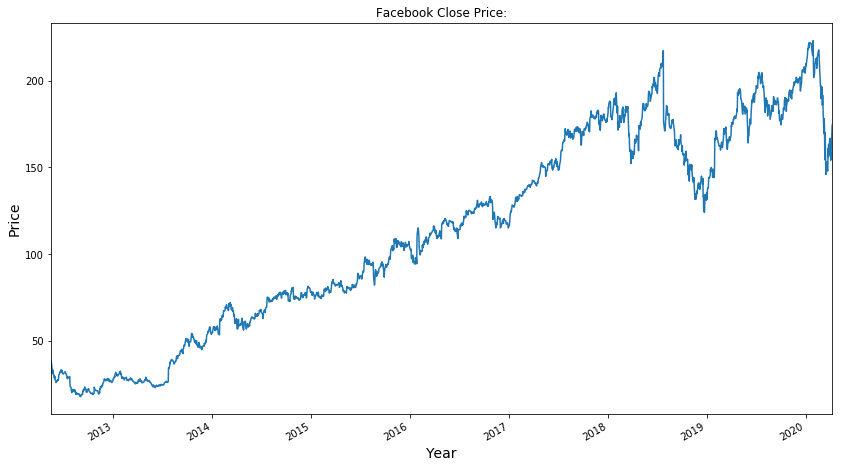

In [32]:
plt.figure(figsize=(14,8))
df['Close'].plot()
plt.title("Facebook Close Price:")
plt.ylabel("Price", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

In [ ]:
# ADD PLOTLY CHART (CLOSE) -- BETTER CLOSE PRICE ABOVE 

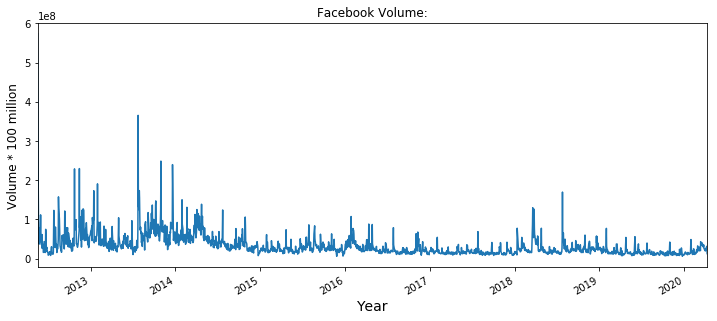

In [31]:
plt.figure(figsize=(12,5))
df['Volume'].plot()
plt.title("Facebook Volume:")
plt.ylabel("Volume * 100 million", fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.show()

In [ ]:
# ADD PLOTLY CHART(VOLUME) -- BETTER VOLUME ABOVE 

In [ ]:
# HIGH VS LOW

In [ ]:
# VOLUME VS CLOSE 

In [ ]:
# What else to add???? -- something data wise , or more charts 

In [50]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1,0.99961,0.999774,0.999736,-0.465202,0.999736
Low,0.99961,1,0.9997,0.999762,-0.474852,0.999762
Open,0.999774,0.9997,1,0.999507,-0.469243,0.999507
Close,0.999736,0.999762,0.999507,1,-0.470344,1
Volume,-0.465202,-0.474852,-0.469243,-0.470344,1,-0.470344
Adj Close,0.999736,0.999762,0.999507,1,-0.470344,1


We can see above that the High, Low, Open, Close and Adjusted Close are all very similar. Whereas Volume has poor correlation. 

In [ ]:
# Show how stocks grown etc 

In [56]:
# Add stock returns / graph 

daily_returns = df['Adj Close'].pct_change()
monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()

print("Daily Returns")
print(daily_returns.head())
print(daily_returns.tail())

Daily Returns
Date
2012-05-18         NaN
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032187
Name: Adj Close, dtype: float64
Date
2020-04-03   -0.025349
2020-04-06    0.073745
2020-04-07    0.019813
2020-04-08    0.032281
2020-04-09   -0.001262
Name: Adj Close, dtype: float64


In [58]:
print("Monthly Returns")
print(monthly_returns.head())
print(monthly_returns.tail())

Monthly Returns
Date
2012-05-31         NaN
2012-06-30    0.050676
2012-07-31   -0.301929
2012-08-31   -0.168125
2012-09-30    0.199336
Freq: M, Name: Adj Close, dtype: float64
Date
2019-12-31    0.017903
2020-01-31   -0.016273
2020-02-29   -0.046754
2020-03-31   -0.133371
2020-04-30    0.043525
Freq: M, Name: Adj Close, dtype: float64
